In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import stats
import matplotlib.backends.backend_pdf
import math
import random
from matplotlib import pyplot as plt 
import numpy as np  
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import sys
from pyecharts.charts import Bar
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.charts import Bar
from pyecharts import options as opts
import dataframe_image as dfi
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
from IPython.core.display import display, HTML
import time
%matplotlib inline
sns.set()

In [52]:
#Load the dataset with the calculated differences Y[t], ommit the first value because difference is NaN and print the head()

def file(fileinput):
    if not ".csv" in fileinput:
        fileinput = "data/" + fileinput + ".csv"
    
    df = pd.read_csv(fileinput,skiprows=0)

    return df

In [53]:
def main():
    
    user_input = str(input("Please enter the name of the .csv file you want to view: "))

    df = file(user_input)
    
    df.head()
    #Rename the columns
    df.columns = ['date', 'value']
    df.head()
    
    df.date = pd.to_datetime(df.date)
    df.set_index('date', inplace=True)
    df.head()

    plt.figure()
    df[['value']].plot(figsize = (20,10), linewidth = 5, fontsize = 20)
    plt.xlabel('Date', fontsize = 30)
    plt.ylabel('Load Value', fontsize = 30)
    plt.title('Load Value Time Series', fontsize = 40)
    plt.legend(loc=2, prop={'size': 20})
    plt.savefig('timeseries_analysis/time_series_data' + time.strftime("%Y-%m-%d %H%M%S") + '.png')

    
    plt.figure()
    print("Smoothing")
    values = df[['value']]
    values.rolling(14).mean().plot(figsize = (20,10), linewidth = 5, fontsize = 20)
    plt.xlabel('Date', fontsize = 30)
    plt.ylabel('Load Value', fontsize = 30)
    plt.title('Smoothed out Time Series', fontsize = 40)
    plt.legend(loc=2, prop={'size': 20})
    plt.savefig('timeseries_analysis/smoothed_data' + time.strftime("%Y-%m-%d %H%M%S") + '.png')

    
    plt.figure()
    values.diff().plot(figsize = (20,10), linewidth = 5, fontsize = 20)
    plt.xlabel('Date', fontsize = 30)
    plt.ylabel('Load Value', fontsize = 30)
    plt.title('Differenced Time Series', fontsize = 40)
    plt.legend(loc=2, prop={'size': 20})
    plt.savefig('timeseries_analysis/differencing_data' + time.strftime("%Y-%m-%d %H%M%S") + '.png')

    
    plt.figure()
    values = df['value']
    pd.plotting.autocorrelation_plot(values)
    plt.savefig('timeseries_analysis/autocorrelation' + time.strftime("%Y-%m-%d %H%M%S") + '.png')
    
    df.corr()
    return



Please enter the name of the .csv file you want to view: 4
Smoothing


<Figure size 432x288 with 0 Axes>

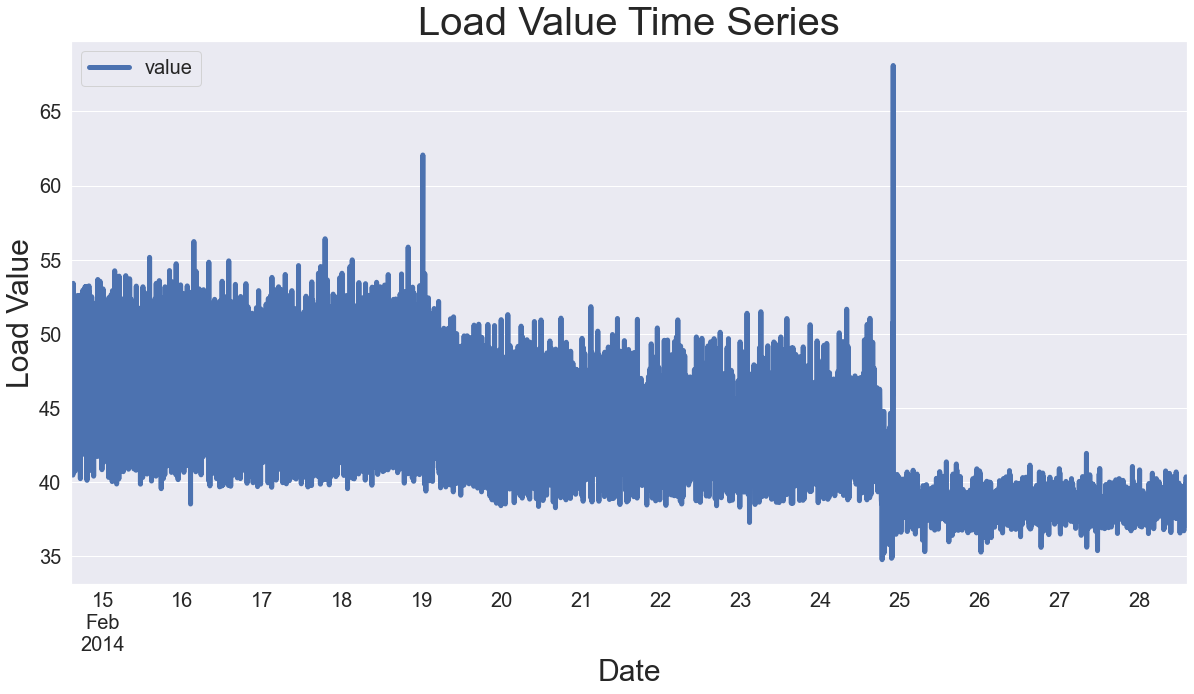

<Figure size 432x288 with 0 Axes>

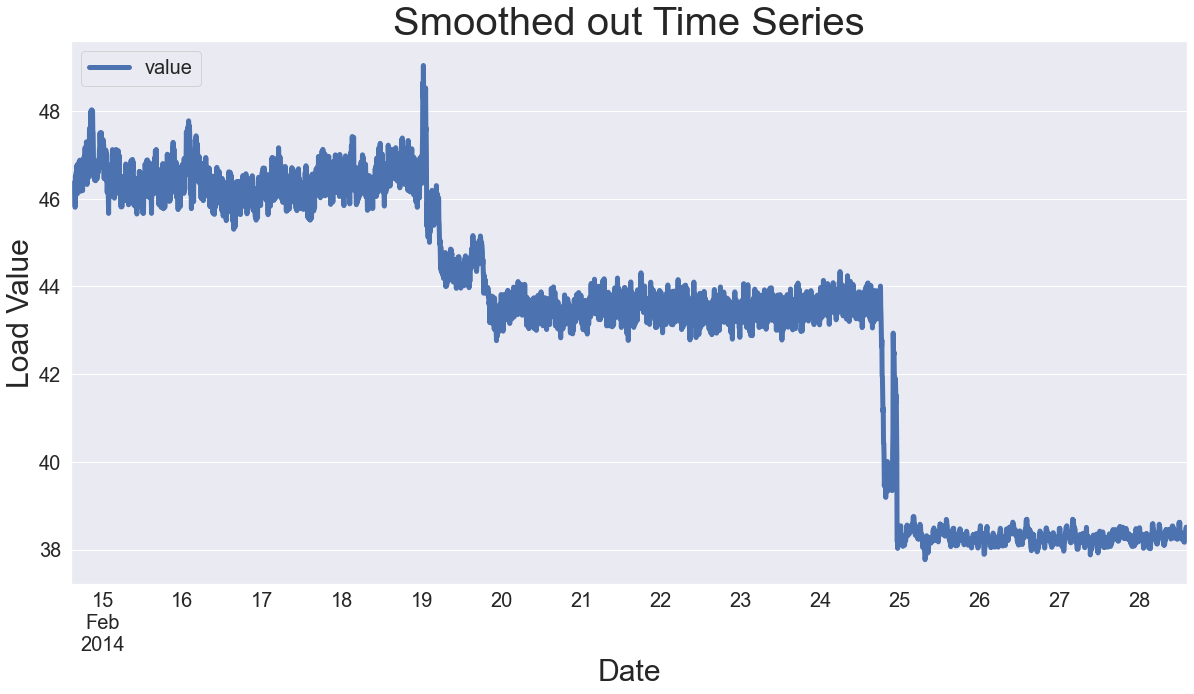

<Figure size 432x288 with 0 Axes>

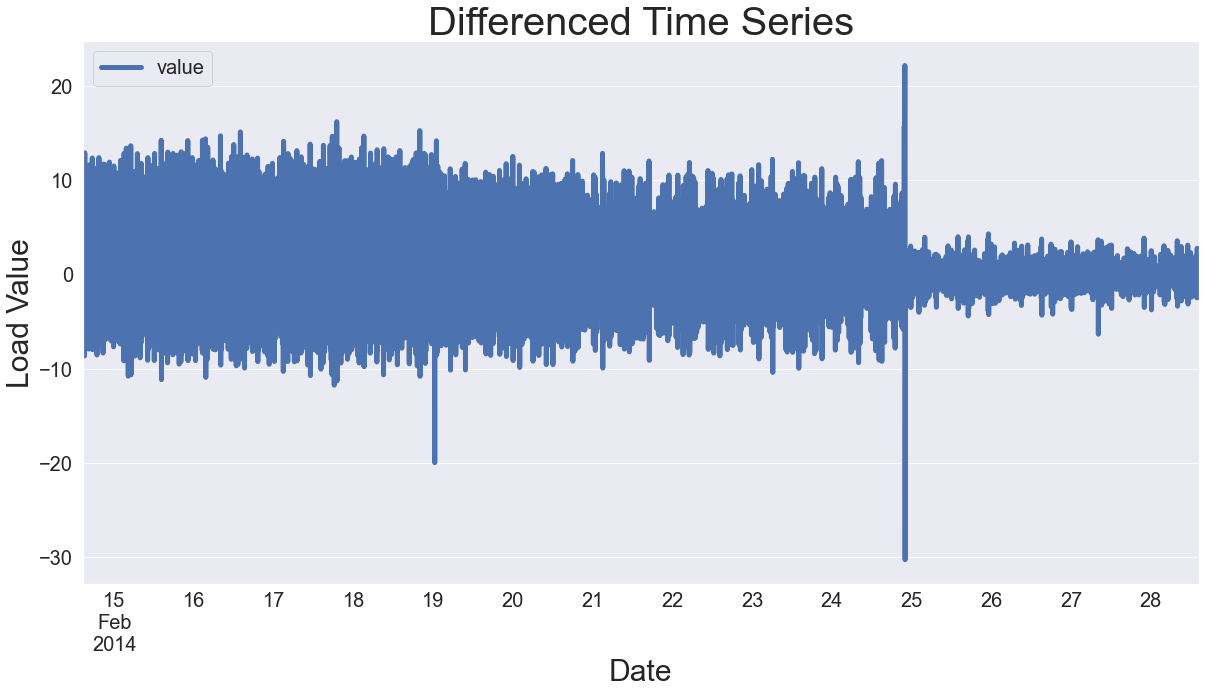

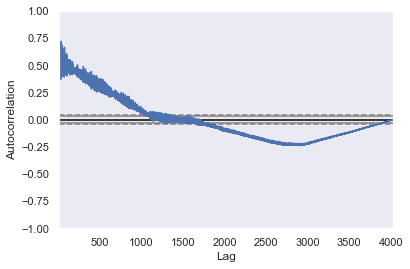

In [54]:
if __name__ == "__main__":
    main()